<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Concevez-une-application-à-destination-de-la-santé:-une-application-pour-faciliter-la-perte-de-poids" data-toc-modified-id="Concevez-une-application-à-destination-de-la-santé:-une-application-pour-faciliter-la-perte-de-poids-1"><strong>Concevez une application à destination de la santé: une application pour faciliter la perte de poids</strong></a></span></li><li><span><a href="#0.-Imports-et-fonctions" data-toc-modified-id="0.-Imports-et-fonctions-2">0. Imports et fonctions</a></span></li><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-3">1. Introduction</a></span></li><li><span><a href="#2.-Le-jeu-des-données" data-toc-modified-id="2.-Le-jeu-des-données-4">2. Le jeu des données</a></span><ul class="toc-item"><li><span><a href="#2.1-Analyse-préliminaire-du-jeu-des-données" data-toc-modified-id="2.1-Analyse-préliminaire-du-jeu-des-données-4.1">2.1 Analyse préliminaire du jeu des données</a></span></li><li><span><a href="#2.2-Prémiers-filtres-sur-les-variables" data-toc-modified-id="2.2-Prémiers-filtres-sur-les-variables-4.2">2.2 Prémiers filtres sur les variables</a></span></li></ul></li><li><span><a href="#3.-Analyses-préliminaires" data-toc-modified-id="3.-Analyses-préliminaires-5">3. Analyses préliminaires</a></span><ul class="toc-item"><li><span><a href="#3.1-Analyse-des-informations-nutritionelles" data-toc-modified-id="3.1-Analyse-des-informations-nutritionelles-5.1">3.1 Analyse des informations nutritionelles</a></span><ul class="toc-item"><li><span><a href="#A.-Analyse-des-variables-salt-et-sodium" data-toc-modified-id="A.-Analyse-des-variables-salt-et-sodium-5.1.1">A. Analyse des variables salt et sodium</a></span></li><li><span><a href="#B.-Analyse-des-nutriments" data-toc-modified-id="B.-Analyse-des-nutriments-5.1.2">B. Analyse des nutriments</a></span></li></ul></li><li><span><a href="#3.2-Analyse-des-vitamines" data-toc-modified-id="3.2-Analyse-des-vitamines-5.2">3.2 Analyse des vitamines</a></span></li><li><span><a href="#3.3-Analyse-des-catégories" data-toc-modified-id="3.3-Analyse-des-catégories-5.3">3.3 Analyse des catégories</a></span></li><li><span><a href="#3.4-Analyse-du-Nutri-score" data-toc-modified-id="3.4-Analyse-du-Nutri-score-5.4">3.4 Analyse du Nutri-score</a></span></li></ul></li><li><span><a href="#4.-Traitement-des-valeurs-manquantes" data-toc-modified-id="4.-Traitement-des-valeurs-manquantes-6">4. Traitement des valeurs manquantes</a></span><ul class="toc-item"><li><span><a href="#4.1-Macronutriments" data-toc-modified-id="4.1-Macronutriments-6.1">4.1 Macronutriments</a></span><ul class="toc-item"><li><span><a href="#A.-Glucides-et-sucres" data-toc-modified-id="A.-Glucides-et-sucres-6.1.1">A. Glucides et sucres</a></span></li><li><span><a href="#B.-Gras-et-gras-saturés" data-toc-modified-id="B.-Gras-et-gras-saturés-6.1.2">B. Gras et gras saturés</a></span></li><li><span><a href="#C.-Proteines" data-toc-modified-id="C.-Proteines-6.1.3">C. Proteines</a></span></li></ul></li><li><span><a href="#4.2-Apport-énergétique" data-toc-modified-id="4.2-Apport-énergétique-6.2">4.2 Apport énergétique</a></span></li><li><span><a href="#4.3-Teneur-en-sel" data-toc-modified-id="4.3-Teneur-en-sel-6.3">4.3 Teneur en sel</a></span></li><li><span><a href="#4.4-Teneur-en-fibres" data-toc-modified-id="4.4-Teneur-en-fibres-6.4">4.4 Teneur en fibres</a></span></li><li><span><a href="#4.5-Score-nutritionnel" data-toc-modified-id="4.5-Score-nutritionnel-6.5">4.5 Score nutritionnel</a></span></li><li><span><a href="#4.6-Catégorie-du-produit-:-PNNS-groups" data-toc-modified-id="4.6-Catégorie-du-produit-:-PNNS-groups-6.6">4.6 Catégorie du produit : PNNS groups</a></span><ul class="toc-item"><li><span><a href="#4.6.1-pnns_groups_1" data-toc-modified-id="4.6.1-pnns_groups_1-6.6.1">4.6.1 pnns_groups_1</a></span></li><li><span><a href="#4.6.2-pnns_groups_2" data-toc-modified-id="4.6.2-pnns_groups_2-6.6.2">4.6.2 pnns_groups_2</a></span></li></ul></li><li><span><a href="#4.7-Nutri-score" data-toc-modified-id="4.7-Nutri-score-6.7">4.7 Nutri-score</a></span></li></ul></li><li><span><a href="#5.-Conclusions" data-toc-modified-id="5.-Conclusions-7">5. Conclusions</a></span></li></ul></div>

# **Concevez une application à destination de la santé: une application pour faciliter la perte de poids**

# 0. Imports et fonctions

In [412]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [420]:
def remove_outliers_nutrients(data, columns):
    """Cette fonction prend en entrée un dataframe, et supprime les observations aberrantes, c’est-à-dire les observations pour 
    lesquelles les valeurs nutritionnelles ne sont pas comprises entre 0g et 100g. 
    Pour le sel et les fibres, les limites sont plus contraignantes parc qu'il est rare des trouver des produits avec 
    une teneur en sel ou en fibres très élevée
    ----------------------------------------------------------------------------------------------------------
    Args: 
    data : dataframe 
    columns : liste des variables (colonnes) où il faut enlever les valeurs aberrantes
    
    Return: dataframe sans valeurs aberrantes
    
    """
    for col in columns:
        #mask pour ne garder que les valeurs manquantes ou les valeurs comprises entre 0 et 100
        mask = (data[col].isna() | ((data[col] >= 0) & (data[col] <= 100)))
        data = data[mask]
    #mask pour le sel: la teneur doir etre inférieure à 10g
    mask = (data['salt_100g'].isna() | ((data['salt_100g'] >= 0) & (data['salt_100g'] <= 10)))
    data = data[mask]
    #mask pour les fibres: la teneur doir etre inférieure à 60g
    mask = (data['fiber_100g'].isna() | ((data['fiber_100g'] >= 0) & (data['fiber_100g'] <= 60)))
    data = data[mask]
    return data.reset_index().drop("index", axis = 1)  
    
def remove_outliers_vitamins(data, columns): 
    """Cette fonction prend en entrée un dataframe, et supprime les observations aberrantes, c’est-à-dire 
    les observations pour lesquelles les valeurs nutritionnelles liées aux vitaminesne sont pas comprises 
    entre 0g et 1g. 
    ----------------------------------------------------------------------------------------------------------
    Args: 
    data : dataframe 
    columns : liste des variables (colonnes) où il faut supprimer les valeurs aberrantes
    
    Return: dataframe sans valeurs aberrantes
    
    """
    for col in columns:
        #mask pour ne garder que les valeurs manquantes ou les valeurs comprises entre 0 et 1
        mask = (data[col].isna() | ((data[col] >= 0) & (data[col] <= 1)))
        data = data[mask]

    return data.reset_index().drop("index", axis = 1)    

def clean_pnns_1(data):
    """Cette fonction prend en entrée un dataframe et uniformise les valeurs de la variable 'pnns_groups_1'. 
    ----------------------------------------------------------------------------------------------------------
    Args: 
    data : dataframe 
    Return: dataframe avec les valeurs de la variable 'pnns_groups_1' uniformisés
    
    """
    for category in data['pnns_groups_1'].unique():
        if category is not np.nan:
            #remplacement de la catégorie unknown avec Nan
            if category == 'unknown': 
                data.loc[data['pnns_groups_1']==category, 'pnns_groups_1'] = np.nan
            elif category.islower():
                #uniformisations des noms des catégories
                new_name = " ".join(category.split("-")).capitalize()
                data.loc[data['pnns_groups_1']==category, 'pnns_groups_1'] = new_name
    return data

def clean_pnns_2(data):
    """Cette fonction prend en entrée un dataframe et uniformise les valeurs de la variable 'pnns_groups_2'. 
    ----------------------------------------------------------------------------------------------------------
    Args: 
    data : dataframe 
    Return: dataframe avec les valeurs de la variable 'pnns_groups_2' uniformisés
    
    """
    for category in data['pnns_groups_2'].unique():
        if category is not np.nan:
             #remplacement de la catégorie unknown avec Nan
            if category == 'unknown': 
                data.loc[data['pnns_groups_2']==category, 'pnns_groups_2'] = np.nan
            elif category.islower():
                #uniformisations des noms des catégories
                new_name = category.capitalize()
                data.loc[data['pnns_groups_2']==category, 'pnns_groups_2'] = new_name
    return data

def remove_outliers_scores(data):
    """Cette fonction prend en entrée un dataframe, et supprime les observations aberrantes, c’est-à-dire 
    les observations pour lesquelles la correspondance entre score nutritionnel et Nutri-score n'est pas correcte. 
    ----------------------------------------------------------------------------------------------------------
    Args: 
    data : dataframe 
    
    Return: dataframe sans valeurs aberrantes
    
    """
    #initialisation liste pour stocker les index des valeurs aberrantes
    indexes_to_drop = []
    #dictionnaire de corresnpondance Nutri-score et score nutritionnel
    dict_ranges = {'a': (-15, 1), 'b': (-15, 2), 'c': (2, 10), 'd': (6, 18), 'e': (10, 40)}
    for grade, values in dict_ranges.items():
        data_grade = data[data['nutrition_grade_fr']== grade]
        to_drop = (data_grade[(data_grade['nutrition-score-fr_100g'] < values[0]) | (data_grade['nutrition-score-fr_100g'] > values[1]) ]).index
        indexes_to_drop = indexes_to_drop + list(to_drop)
    data.drop(indexes_to_drop, inplace = True)
    return data.reset_index().drop("index", axis = 1)  

def energy_100_null_values(data):
    """Cette fonction prend en entrée un dataframe et remplace les valeurs manquantes de la variable 'energy_100' 
    avec une nouvelle variable qui est l'apport énérgetique calculé en fonction des macronutriments. De plus, elle 
    supprime les valeurs aberrantes, pour lesquels l'apport énergétique est trop éleve. L'apport énergétique maximal
    correspond aux produits composés à 100% des gras ce qui correspond à 3768.12 KJ. 
    ----------------------------------------------------------------------------------------------------------
    Args: 
    data : dataframe 
    
    Return: dataframe avec valeurs manquantes de la variable 'energy_100g remplacés'
    
    """
    #calcul apport énergétique
    data['calculated_energy'] = (data['fat_100g']*9 + data['carbohydrates_100g']*4 + data['proteins_100g']*4)*4.1868
    #remplacement des valeurs manquantes
    data['energy_100g'] = data['energy_100g'].fillna(data['calculated_energy'])
    #supression des valeurs aberrantes
    data = data[data['energy_100g'] <= 3768.12]
    data.drop('calculated_energy', axis = 1 ,inplace = True)
    return data.reset_index().drop("index", axis = 1) 

def knn_imputer(data, columns, n_neighbors):
    """Cette fonction remplace les valeurs manquantes d'une variable numerique (ou plusierus) en utilisant 
    la methode KNN Imputer.
    ----------------------------------------------------------------------------------------------------------
    Args: 
    data : dataframe 
    columns: variables à fournir en entrée au KNN Imputer
    n_neighbors: nombre des voisins du KNN Imputer
    
    Return: dataframe avec valeurs imputées
    
    """
    #scaling des données
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[columns])
    #KNN imputer
    imputer = KNNImputer(n_neighbors=n_neighbors)
    data_transformed = imputer.fit_transform(data_scaled)
    #transformation inverse du StandardScaler
    data_rescaled = pd.DataFrame(scaler.inverse_transform(data_transformed), columns = columns, index = data.index)
    return data_rescaled

def knn_imputer_categorical(data, categorical, columns, n_neighbors):
    """Cette fonction remplace les valeure manquantes d'une variable catégorielle en utilisant la methode 
    KNN Imputer.
    ----------------------------------------------------------------------------------------------------------
    Args: 
    data : dataframe 
    categorical: variable catégorielle avec valeurs manquantes
    columns: variables à fournir en entrée au KNN Imputer
    n_neighbors: nombre des voisins du KNN Imputer
    
    Return: dataframe avec valeurs imputées
    
    """
    #selection données en entrée
    data_columns = data[columns]
    #labelisation numérique de la variable catégorielle
    categorical_notna = data_columns.loc[data_columns[categorical].notna(), categorical]
    labels = LabelEncoder()
    numerical_labels = pd.Series(labels.fit_transform(categorical_notna), index= categorical_notna.index)
    data_columns.loc[categorical_notna.index, categorical] = numerical_labels
    data_columns[categorical]= data_columns[categorical].astype('float64')
    #scaling des données
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data_columns)
    #imputation KNN
    imputer = KNNImputer(n_neighbors=n_neighbors)
    data_transformed = imputer.fit_transform(scaled)
    #tranformation inverse du Standardscaler
    data_rescaled = pd.DataFrame(scaler.inverse_transform(data_transformed), columns = columns, index = data.index)
    #remplacement de la variable catégorielle avec la variable imputée
    data.loc[:, categorical] = data_rescaled.loc[:, categorical].values
    #tranformation inverse du LabelEncoder
    data[categorical] =  data[categorical].astype('int64')
    data[categorical] = labels.inverse_transform(data[categorical])
    return data

def fill_nutrition_scores(data):
    """Cette fonction remplace les valeure manquantes du nutriscore en attribuant au score nutritionnel le Nutri-score
    approprié (la conversion est différente pour les produits solides et les boissons).
    ----------------------------------------------------------------------------------------------------------
    Args: 
    data : dataframe     
    Return: dataframe avec valeurs manquantes de la variable 'nutrition_grade_fr' remplacées
    
    """
    #initialisation de la variable 'calculated_grade' a NaN
    data['calculated_grade'] = np.nan
    #dictionnaire de conversion produits solides
    dict_ranges_solid = {'a': (-15, -1), 'b': (0, 2), 'c': (3, 10), 'd': (11, 18), 'e': (19, 40)}
    #dictionnaire de conversion boission
    dict_ranges_bev = {'b': (-15, 1), 'c': (2, 5), 'd': (6, 9), 'e': (10, 40)}
    #boissons
    data_bev = data[data['pnns_groups_1']=='Beverages']
    #produits solides
    data_sol = data[data['pnns_groups_1']!='Beverages']
    #conversion score nutritionnel - Nutri-score
    for grade, values in dict_ranges_solid.items():
        data_grade = data_sol[(data_sol['nutrition-score-fr_100g'] >= values[0]) & (data_sol['nutrition-score-fr_100g'] <= values[1]) ].index
        data_sol.loc[data_grade, "calculated_grade"] = grade
    for grade, values in dict_ranges_bev.items():
        data_grade = data_bev[(data_bev['nutrition-score-fr_100g'] >= values[0]) & (data_bev['nutrition-score-fr_100g'] <= values[1]) ].index
        data_bev.loc[data_grade, 'calculated_grade'] = grade
    data = pd.concat([data_bev, data_sol])
    #remplacement des valeurs manquantes
    data['nutrition_grade_fr'] = data['nutrition_grade_fr'].fillna(data['calculated_grade'])
    #suppression de la variables calculated_grade, qui a accompli son but
    data.drop(['calculated_grade'], axis = 1, inplace=True)
    return data

def clean_dataset(path):
    """
    fonction pour automatiser le traitement du dataset
    """
    data = pd.read_csv(path, sep = '\t', low_memory= False)
    columns = ['code', 'url', 'product_name','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g', 'fiber_100g','proteins_100g', 
        'salt_100g','vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g','vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g','vitamin-b2_100g', 'vitamin-pp_100g', 
        'vitamin-b6_100g','vitamin-b9_100g', 'vitamin-b12_100g','energy_100g', 'pnns_groups_1', 'nutrition_grade_fr',            
        'nutrition-score-fr_100g']
    data = data[columns]
    nutrients_columns = [ 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g', 'fiber_100g',
                         'proteins_100g', 'salt_100g']
    data = remove_outliers_nutrients(data, nutrients_columns)
    print('outliers nutrients done')
    vitamins_columns = ['vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g','vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g','vitamin-b2_100g', 'vitamin-pp_100g', 
        'vitamin-b6_100g','vitamin-b9_100g', 'vitamin-b12_100g']
    data = remove_outliers_vitamins(data, vitamins_columns)
    print('outliers vitamins done')
    data_vitamines_columns = data.columns[data.columns.str.contains('vitamin') |  data.columns.str.contains('carotene')]
    data['vitamins_100g'] = data[data_vitamines_columns].sum(axis = 1)
    data = data.drop(data_vitamines_columns, axis = 1)
    print('vitamins sum done')
    data = clean_pnns_1(data)
    print('pnns 1 cleaned')
    data = remove_outliers_scores(data)
    print('outliers score done')
    data = data[data['carbohydrates_100g'].notna()|data['sugars_100g'].notna()]
    data['sugars_100g'] = data['sugars_100g'].fillna(data['carbohydrates_100g'])
    data['carbohydrates_100g'] = data['carbohydrates_100g'].fillna(data['sugars_100g'])
    mask = (data["carbohydrates_100g"] - data["sugars_100g"])>= 0
    data = data[mask]
    print('glucides/sucres done')
    data= data[data['fat_100g'].notna()|data['saturated-fat_100g'].notna()]
    data['fat_100g'] = data['fat_100g'].fillna(data['saturated-fat_100g'])
    data['saturated-fat_100g'] = data['saturated-fat_100g'].fillna(data['fat_100g'])
    mask = (data["fat_100g"] - data["saturated-fat_100g"])>= 0
    data = data[mask]
    print('gras/gras saturés done')
    data = data[data["proteins_100g"].notna()]
    print('proteins done')
    data = energy_100_null_values(data)
    print('energy done')
    data['salt_100g'] = data['salt_100g'].fillna(data['salt_100g'].median())
    print('salt done')
    imputed_data = knn_imputer(data, nutrients_columns, 5)
    data['fiber_100g'] = data['fiber_100g'].fillna(imputed_data['fiber_100g'])
    print('fiber done')
    mask = data["fat_100g"] + data["carbohydrates_100g"]+ data["proteins_100g"]+  data["vitamins_100g"]+ data["salt_100g"]+ data["fiber_100g"] <= 100
    data = data[mask]
    data.reset_index().drop("index", axis = 1, inplace= True)
    print('nutrients done')
    knn_data_nutriscore = ['energy_100g', 'fat_100g', 'saturated-fat_100g','sugars_100g', 'fiber_100g', 'proteins_100g',
    'salt_100g', 'nutrition-score-fr_100g', 'vitamins_100g']
    imputed_data_score = knn_imputer(data, knn_data_nutriscore, 5)
    data["nutrition-score-fr_100g"] = data["nutrition-score-fr_100g"].fillna(imputed_data_score["nutrition-score-fr_100g"].astype('int64'))
    print('Nutrition-score done')
    columns_knn_pnns_1 = ['pnns_groups_1','energy_100g', 'fat_100g','saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 
    'fiber_100g','proteins_100g', 'salt_100g', 'nutrition-score-fr_100g','vitamins_100g']
    data = knn_imputer_categorical(data, 'pnns_groups_1', columns_knn_pnns_1, 15)
    print('imputer pnns_groups_1 done')
    data = fill_nutrition_scores(data)
    print('Nutri-score filled')
    data['code'] = data['code'].astype('float64')
    data['code'] = data['code'].astype('int64')
    data.to_csv('Data/Cleaning/automatised_cleaning.csv')

# 1. Introduction

Ce projet consiste en la proposition d'une application à destination de la santé, en utilisant le jeu de données Open Food Facts. 

Mon idée d'application est la suivante : **l’utilisateur va utiliser l’application pour scanner un produit, et l'application va proposer des produits similaires, c’est à dire dans la même catégorie, avec des valeurs de  macronutriments similaires, avec le même Nutri-score ou un Nutri-score supérieur, mais avec moins de calories.**
(Le Nutri-score est un système d'étiquetage nutritionnel à cinq niveaux, allant de A à E et du vert au rouge, établi en fonction de la valeur nutritionnelle d'un produit alimentaire).

Il faudra vérifier la faisabilité de cette application à partir de ce jeu de données, et pour ce faire, la première étape consiste dans le pré-traitement des données pour sélectionner les variables d'intérêt, supprimer doublons, supprimer les valeurs aberrantes et traiter les valeurs manquantes.


# 2. Le jeu des données

## 2.1 Analyse préliminaire du jeu des données

Le jeu de données Open Food Facts est disponible sur le site officiel. 
Les variables sont définies à cette adresse :
https://world.openfoodfacts.org/data/data-fields.txt

Je vais commencer à examiner le jeu des données

In [365]:
#lecture jeu des données.  
path = 'Data/Source/'
data = pd.read_csv(path + 'fr.openfoodfacts.org.products.csv',sep = '\t', low_memory= False)  #low memory = false pour eviter un warning sur les colonnes avec des mixed types

In [366]:
#nombre des lignes et colonnes
data.shape

(320772, 162)

In [367]:
#exemple des données
data.sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
117396,0607880010558,http://world-fr.openfoodfacts.org/produit/0607...,usda-ndb-import,1489137325,2017-03-10T09:15:25Z,1489137325,2017-03-10T09:15:25Z,Cream Style Corn,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
313447,8710496977176,http://world-fr.openfoodfacts.org/produit/8710...,openfoodfacts-contributors,1461524196,2016-04-24T18:56:36Z,1461524197,2016-04-24T18:56:37Z,DeRuijter,NaN,400 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185180,26063256,http://world-fr.openfoodfacts.org/produit/2606...,sto,1492608144,2017-04-19T13:22:24Z,1492608311,2017-04-19T13:25:11Z,Pommes,"Pommes GALA, CAL 136-200g, Catégorie 1",1500 g,...,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,-5.0,NaN,NaN
223479,3292090135244,http://world-fr.openfoodfacts.org/produit/3292...,kiliweb,1486542773,2017-02-08T08:32:53Z,1486542902,2017-02-08T08:35:02Z,Coca-cola zéro 2L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
308069,8412800005857,http://world-fr.openfoodfacts.org/produit/8412...,neptuno,1488536457,2017-03-03T10:20:57Z,1488544599,2017-03-03T12:36:39Z,Postre cremoso de arroz,Postre de arroz,400 g (4 x 100 g),...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN


In [368]:
#informations sur le dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [369]:
pd.set_option('display.max_rows', None)

In [370]:
data.isna().sum()

code                                              23
url                                               23
creator                                            2
created_t                                          3
created_datetime                                   9
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17762
generic_name                                  267977
quantity                                      215953
packaging                                     241812
packaging_tags                                241811
brands                                         28412
brands_tags                                    28420
categories                                    236362
categories_tags                               236383
categories_fr                                 236361
origins                                       298582
origins_tags                                  

In [371]:
#verification doublons
data.duplicated().sum()

0

Le jeu de données comprend 320772 produits et 162 variables, il n'y a pas des doublons.
Le jeu de données, comme anticipé sur la page web des définitions des variables, peut être séparé en quatre groupes :

 - Les informations générales sur le produit : nom, date de modification, etc.
 - Un ensemble de tags : catégorie du produit, localisation, origine, etc.
 - Les ingrédients composant les produits et leurs additifs éventuels
 - Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit
 
Il y a énormément des valeurs manquantes, mais aussi beaucoup de variables qui ne sont pas utiles à l’application. Je vais donc commencer à filtrer les variables.

## 2.2 Prémiers filtres sur les variables

Je vais réaliser un premier filtre en suppriment la majorité des variables qui ne sont pas liées aux informations nutritionnelles ou au Nutri-score (variables liées aux origines, packaging, labels, huile de palme, pays, addictifs, etc.). Je vais néanmoins garder le code du produit (pour l’identifier à partir d’un scan), ainsi que son nom et url sur Open Food Facts, pour pouvoir les afficher sur l’application. 

In [372]:
data = data.drop([
    'creator', 
    'created_t', 
    'created_datetime', 
    'last_modified_t', 
    'last_modified_datetime', 
    'generic_name', 
    'quantity', 
    'packaging', 
    'packaging_tags', 
    'brands', 
    'brands_tags', 
    'origins', 
    'origins_tags', 
    'manufacturing_places', 
    'manufacturing_places_tags', 
    'labels', 
    'labels_tags', 
    'labels_fr', 
    'emb_codes', 
    'emb_codes_tags', 
    'first_packaging_code_geo', 
    'cities', 
    'cities_tags', 
    'purchase_places', 
    'stores', 
    'countries', 
    'countries_fr', 
    'countries_tags', 
    'ingredients_text', 
    'allergens', 
    'allergens_fr', 
    'traces', 
    'traces_tags', 
    'traces_fr', 
    'serving_size', 
    'no_nutriments', 
    'additives_n', 
    'additives', 
    'additives_tags', 
    'additives_fr', 
    'ingredients_from_palm_oil_n', 
    'ingredients_from_palm_oil', 
    'ingredients_from_palm_oil_tags', 
    'ingredients_that_may_be_from_palm_oil_n', 
    'ingredients_that_may_be_from_palm_oil', 
    'ingredients_that_may_be_from_palm_oil_tags', 
    'states', 
    'states_tags', 
    'states_fr', 
    'image_url', 
    'image_small_url', 
    'carbon-footprint_100g']
    , axis = 1)

In [373]:
#nombre lignes et colonnes
data.shape

(320772, 110)

Ainsi, les variables ont été réduites à 110

Aussi, je ne vais pas m'intéresser aux acides: même si certains acides pourraient apporter des bienfaits, il ne sont pas liés au nombre des calories ou au Nutri-score.

In [374]:
#filtre pour eliminer les acides
data = data.loc[:,~data.columns.str.contains("acid")]

In [375]:
#nombre lignes et colonnes
data.shape

(320772, 82)

Maintenant, il devient plus facile d’examiner les variables. 


In [376]:
#liste des variables
data.columns

Index(['code', 'url', 'product_name', 'categories', 'categories_tags',
       'categories_fr', 'nutrition_grade_uk', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr',
       'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'omega-3-fat_100g', 'omega-6-fat_100g', 'omega-9-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g',
       'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g',
       'polyols_100g', 'fiber_100g', 'proteins_100g', 'casein_100g',
       'serum-proteins_100g', 'nucleotides_100g', 'salt_100g', 'sodium_100g',
       'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g',
       'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g',
       'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g',
      

Après ces premiers filtres, parmi les variables qui restent, je ne vais garder que les macronutriments (glucides,  gras, et proteines) et les éléments qui contribuent au Nutri-Score : apport énergétique, acides gras saturés,  fibres et teneur en sel. (Pour plus de détails : https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique). 

Je vais également garder toutes les variables liées aux vitamines : en effet les vitamines sont prises en compte dans le Nutri-Score par la teneur minimale en fruits, légumes, légumineuses, fruits à coque et huiles de colza, de noix et d’olive. Dans le jeu des données, il s’agit de la variable `fruits-vegetables-nuts_100g`, constituée à 99% des valeurs manquantes. Dans la suite, je vais essayer créer une variable liée à la somme de vitamines pour remplacer la variable `fruits-vegetables-nuts_100g`.


In [377]:
#variables à supprimer
to_drop = [
    'energy-from-fat_100g', 
    'monounsaturated-fat_100g', 
    'polyunsaturated-fat_100g', 
    'omega-3-fat_100g', 
    'omega-6-fat_100g', 
    'omega-9-fat_100g', 
    'trans-fat_100g', 
    'cholesterol_100g', 
    'sucrose_100g', 
    'glucose_100g', 
    'fructose_100g', 
    'lactose_100g', 
    'maltose_100g', 
    'maltodextrins_100g', 
    'starch_100g', 
    'polyols_100g', 
    'casein_100g', 
    'serum-proteins_100g', 
    'nucleotides_100g', 
    'folates_100g', 
    'biotin_100g', 
    'silica_100g', 
    'bicarbonate_100g', 
    'potassium_100g', 
    'chloride_100g', 
    'calcium_100g', 
    'phosphorus_100g', 
    'iron_100g', 
    'magnesium_100g', 
    'zinc_100g', 
    'copper_100g', 
    'manganese_100g', 
    'fluoride_100g', 
    'selenium_100g', 
    'chromium_100g', 
    'molybdenum_100g', 
    'iodine_100g', 
    'caffeine_100g', 
    'taurine_100g', 
    'ph_100g', 
    'collagen-meat-protein-ratio_100g', 
    'cocoa_100g', 
    'chlorophyl_100g', 
    'glycemic-index_100g', 
    'water-hardness_100g', 
    'alcohol_100g']

In [378]:
#on drop les variables pas interessantes
data = data.drop(to_drop, axis = 1)

In [379]:
#nombre des lignes et colonnes
data.shape

(320772, 36)

Ainsi, les variables ont été réduites à 36

In [380]:
#sauvegarde dataframe
data.to_csv('Data/Cleaning/first_filter_columns.csv', index = False)

# 3. Analyses préliminaires

In [381]:
#lecture données
data = pd.read_csv('Data/Cleaning/first_filter_columns.csv', low_memory=False)

Maintenant que j'ai réduit le nombre variables, je peux analyser plus en détail les variables d'intérêt.

In [383]:
#taux valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values()

code                           0.000072
url                            0.000072
product_name                   0.055373
energy_100g                    0.185986
proteins_100g                  0.189699
salt_100g                      0.203453
sodium_100g                    0.203599
sugars_100g                    0.236308
fat_100g                       0.239675
carbohydrates_100g             0.240620
saturated-fat_100g             0.284370
nutrition-score-fr_100g        0.310382
nutrition-score-uk_100g        0.310382
nutrition_grade_fr             0.310382
fiber_100g                     0.373742
vitamin-c_100g                 0.560850
vitamin-a_100g                 0.571178
pnns_groups_2                  0.705426
pnns_groups_1                  0.714710
categories_fr                  0.736850
categories                     0.736854
categories_tags                0.736919
main_category_fr               0.736991
main_category                  0.736991
vitamin-pp_100g                0.963435


On peut identifier 4 groupes de variables qui ont aussi un taux de valeurs manquantes similaire :
 - Informations nutritionnelles : valeurs manquantes entre 19 et 37%
 - Vitamines : valeurs manquantes > 96 %
 - Catégories du produit : valeurs manquantes autour de 73%
 - Nutri-score : sauf nutrition-grade_uk, qui en principe devrait être la 'note' comprise antre A e E, les autres variables ont un taux de valeur manquantes de 31%

Je vais effectuer une analyse pour chacun de ces groupes, pour mieux comprendre les données, éventuellement faire des filtres supplémentaires sur les variables et déjà commencer à supprimer des valeurs manquantes ou aberrantes.


## 3.1 Analyse des informations nutritionelles

Ce groupe comprend les macronutriments et les éléments contribuant au Nutri-score (hormis la teneur en fruits-vegetables-nuts).

In [384]:
#variables liées aux informations nutritionelles et/ou nutriscore
nutrients_columns = [ 
    'fat_100g', 
    'saturated-fat_100g', 
    'carbohydrates_100g',
    'sugars_100g', 
    'fiber_100g', 
    'proteins_100g', 
    'salt_100g',
    'sodium_100g'
                    ]
nutrients = data[nutrients_columns]

In [385]:
#type des donnés
nutrients.dtypes

fat_100g              float64
saturated-fat_100g    float64
carbohydrates_100g    float64
sugars_100g           float64
fiber_100g            float64
proteins_100g         float64
salt_100g             float64
sodium_100g           float64
dtype: object

Toutes les variables sont des variables numeriques

On peut remarquer qu'il y a deux variables liées à la teneur en sel : `salt_100g` et `sodium_100g`. Selon le document https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique, pour calculer la contribution du sel au Nutri-score il faut diviser le contenu en sel par 2.5. Je vais analyser les 2 variables en considérant cette information.

### A. Analyse des variables salt et sodium

In [386]:
#sample de 10 valeurs de salt et sodium
nutrients[['salt_100g','sodium_100g']].sample(10)

,salt_100g,sodium_100g
39834,0.02540,0.010000
251480,0.18000,0.070866
212257,5.27000,2.074803
150527,0.76200,0.300000
241835,0.15000,0.059055
15152,0.28448,0.112000
250624,NaN,NaN
298908,0.69000,0.271654
155173,0.03810,0.015000
98105,0.00000,0.000000


En comparant les deux variables, il semble raisonnable de penser que `sodium_100g` correspond à `salt_100g` divisé par 2.5
Pour le vérifier, je vais comparer la distribution de la variable salt_100 g divisée par 2.5 et de la variable sodium_100g.

In [387]:
#nouveau dataframe pour la comparaision de salt_100g et sodium_100g, en gardant que les valeurs non nulles
salt_data = nutrients.loc[nutrients['salt_100g'].notna() & nutrients['sodium_100g'].notna(), ['salt_100g','sodium_100g']]

In [388]:
#initialization de la variable sel/2.5
salt_data['salt_100g/2.5'] = (salt_data['salt_100g']/2.5)
salt_data.drop('salt_100g', axis = 1, inplace=True)

In [389]:
salt_data.describe()

,sodium_100g,salt_100g/2.5
count,255463.000000,255463.000000
mean,0.798815,0.811598
std,50.504428,51.312500
min,0.000000,0.000000
25%,0.025000,0.025400
50%,0.229000,0.232664
75%,0.541000,0.549656
max,25320.000000,25725.120000


En effet, les données semblent très similaires (moyenne, déviation standard et médiane sont proches). Cependant, on peut remarquer des valeurs aberrantes (la teneur maximale pour 100 g est de 25320 g, ce qui n'a pas de sens. Je vais donc filtrer pour ne garder que les valeurs inferieurs à 40 (40 = 100/2.5) ). Aussi, les valeurs de `salt_100g/2.5` semblent être légèrement supérieurs à ceux de `sodium_100g`, il pourrait s'agir d'un souci d'arrondis. Afin de vérifier que les distributions sont les mêmes (à un facteur près), je vais faire un scaling MinMax

In [390]:
#filtre pour éliminer les valeurs aberrantes
salt_data = salt_data[(salt_data['sodium_100g'] <= 40)]

#scalung des données
scaler_salt = MinMaxScaler()
scaled_data = pd.DataFrame(scaler_salt.fit_transform(salt_data), columns = salt_data.columns)

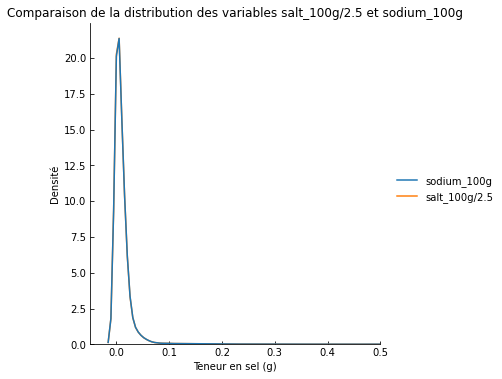

In [391]:
sns.displot(scaled_data, kind = 'kde')
plt.xlim(-0.05, 0.5)
plt.title('Comparaison de la distribution des variables salt_100g/2.5 et sodium_100g')
plt.xlabel('Teneur en sel (g)')
plt.ylabel('Densité')
plt.tick_params(direction = 'in')

Visuellement, les distributions semblent se superposer.
Le test de Wilcoxon-Mann-Whitney est un test statistique non paramétrique qui permet de tester l'hypothèse selon laquelle les distributions de chacun de deux groupes de données sont proches. Je vais l'utiliser pour comparer les données (niveau de confiance 95%). 
L'hypotese nulle est que les distributions sont proches.

In [392]:
#test de Wilcoxon-Mann-Whitney 
mannwhitneyu(scaled_data['salt_100g/2.5'], scaled_data['sodium_100g'])


MannwhitneyuResult(statistic=32506514568.0, pvalue=0.06936215885596865)

La valeur p est petite mais supérieure à 0.05. Je ne peux donc pas rejeter l'hypothèse nulle et je peux considérer les deux distributions équivalentes. Je ne vais garder qu'une seule des deux variable: celle avec moins de valeurs mancantes, c'est à dire le salt_100g.

In [393]:
#supression variable sodium
data.drop('sodium_100g', axis = 1, inplace = True)
nutrients.drop('sodium_100g', axis = 1, inplace = True)

C:\Users\elena\AppData\Local\Temp\ipykernel_19900\1544006373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrients.drop('sodium_100g', axis = 1, inplace = True)


### B. Analyse des nutriments

Maintenant, je vais examiner les autres informations nutritionelles.

In [394]:
#informations statistiques
nutrients.describe()

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,243891.000000,229554.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000
mean,12.730379,5.129932,32.073981,16.003484,2.862111,7.075940,2.028624
std,17.578747,8.014238,29.731719,22.327284,12.867578,8.409054,128.269454
min,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000
25%,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500
50%,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660
75%,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140
max,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000


En considérant les minimas et maximas pour chaque variable, il est évident qu'il y a des valeurs aberrantes : en effet, il n'est pas possible que la teneur pour 100 g soit inférieure à 0 ou supérieure à 100. 

Il peut y avoir des produits constitués à presque 100% de glucides, gras ou protéines. Par contre, il ne serait pas raisonnable de garder des produits avec une teneur en fibres de plus de 60g : en effet, un des aliments le plus riche en fibre est le son de blé (dont la teneur est comprise entre 48g et 55g).

https://fr.wikipedia.org/wiki/Fibre_alimentaire

De même pour le sel: il est certain que le sel de cuisine est composé à 100% de sel, mais la plupart des produits n'ont même pas une teneur de 10g. - Par exemple, la sauce soja, très salée, a une teneur de 5/6 g pour 100 mL. Le viandes et poissons fumés contiennent 2000 à 10000 mg de sodium.

Ainsi, La fonction `remove_outliers_nutrients` supprime tous les produits avec des valeurs nutritionnelles qui ne sont pas comprises entre 0g e 100g, pour les fibres entre 0g et 60g et pour le sel entre 0g et 10g. (La fonction ne supprime pas les valeurs manquantes, qui seront traitées successivement).



In [395]:
#application de la fonction pour enlever les valeurs aberrants
data = remove_outliers_nutrients(data, nutrients.columns)

In [396]:
#nombre des lignes et colonnes
data.shape

(315606, 35)

En faisant cela, le nombre de produit est passé de 320772 à 315606.

In [397]:
#verification que les mimima et maxima sont bien compris entre 0 et la valuer maximale
data[nutrients.columns].describe()

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,239068.000000,226701.000000,238756.000000,241618.000000,198284.000000,254826.000000,250350.000000
mean,12.930488,5.166414,32.145286,16.042894,2.799133,7.132251,0.913375
std,17.591681,7.919456,29.125498,21.216795,4.309072,8.147089,1.213720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.150000,1.400000,0.000000,0.800000,0.058420
50%,5.320000,1.820000,20.710000,5.710000,1.500000,4.800000,0.543560
75%,20.690000,7.140000,58.500000,24.000000,3.600000,10.000000,1.300000
max,100.000000,100.000000,100.000000,100.000000,60.000000,100.000000,10.000000


In [398]:
#sauvegarde dataframe
data.to_csv('Data/Cleaning/filtered_nutrients.csv', index = False)

## 3.2 Analyse des vitamines

In [8]:
#lecture données
data = pd.read_csv('Data/Cleaning/filtered_nutrients.csv',low_memory=False)

In [9]:
#variables identifiant les vitamines + carotene
data_vitamines_columns = data.columns[data.columns.str.contains('vitamin') |  data.columns.str.contains('carotene')]
data_vitamines_columns

Index(['vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g',
       'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g',
       'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g',
       'vitamin-b9_100g', 'vitamin-b12_100g'],
      dtype='object')

In [10]:
#séléction des données liées vitamines
data_vitamines = data[data_vitamines_columns]

In [11]:
#type des valeurs
data_vitamines.dtypes

vitamin-a_100g        float64
beta-carotene_100g    float64
vitamin-d_100g        float64
vitamin-e_100g        float64
vitamin-k_100g        float64
vitamin-c_100g        float64
vitamin-b1_100g       float64
vitamin-b2_100g       float64
vitamin-pp_100g       float64
vitamin-b6_100g       float64
vitamin-b9_100g       float64
vitamin-b12_100g      float64
dtype: object

Toutes le valeurs sont numériques

In [13]:
#information statistiques
data_vitamines.describe()

,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,vitamin-b12_100g
count,135657.000000,33.000000,7053.000000,1338.000000,914.000000,139080.000000,11129.000000,10792.000000,11706.000000,6773.000000,5203.000000,5.291000e+03
mean,0.000390,0.534434,0.000008,0.056533,0.034369,0.017787,0.326124,0.259473,0.019671,0.023303,0.006939,8.910617e-05
std,0.073789,2.599188,0.000360,0.694512,1.033653,1.166704,2.477035,1.278341,0.333924,1.207776,0.336353,5.519364e-03
min,-0.000340,0.000000,0.000000,0.000000,0.000000,-0.002100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.001600,0.000001,0.001800,0.000006,0.000000,0.004000,0.002720,0.003077,0.000258,0.000030,7.150000e-07
50%,0.000000,0.006000,0.000001,0.005200,0.000025,0.000000,0.012000,0.014167,0.005357,0.000700,0.000052,1.910000e-06
75%,0.000107,0.140000,0.000003,0.012000,0.000100,0.003700,0.402000,0.300000,0.009091,0.001481,0.000070,4.690000e-06
max,26.700000,15.000000,0.030000,15.100000,31.250000,370.370400,161.000000,42.500000,21.428571,92.600000,23.076923,4.000000e-01


En général, la teneur en vitamines est exprimée en mg, car très petite. Par exemple, parmi les aliments les plus riches en vitamine C il y a le cassis, pour lequel la teneur et de 200 mg. 

https://sante.journaldesfemmes.fr/calories/classement/aliments/vitamine-c.

Ainsi, je vais considérer come valeur aberrantes toutes les valeurs qui ne sont pas comprises entre 0 et 1g. 
La fonction `remove_outliers_vitamis` supprime les valeurs aberrantes.



In [14]:
data = remove_outliers_vitamins(data, data_vitamines_columns)

In [15]:
#Nombre des lignes et colonnes
data.shape

(314728, 35)

En faisant cela, le nombre de produits est passé de 315606 à 314728.

In [16]:
#verification que la teneur ne depasse pas le gramme
data[data_vitamines_columns].describe()

,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,vitamin-b12_100g
count,134950.000000,31.000000,6635.000000,1318.00000,867.000000,138260.000000,10439.000000,10113.000000,11040.000000,6135.000000,5182.000000,4.781000e+03
mean,0.000145,0.083107,0.000008,0.00995,0.000161,0.007301,0.176961,0.133510,0.008109,0.002023,0.000526,9.563079e-05
std,0.000808,0.114412,0.000371,0.01331,0.001166,0.032294,0.265685,0.196618,0.016221,0.022998,0.014964,5.805985e-03
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.001350,0.000001,0.00180,0.000006,0.000000,0.003000,0.002500,0.002963,0.000214,0.000030,6.300000e-07
50%,0.000000,0.004522,0.000001,0.00505,0.000025,0.000000,0.010000,0.013281,0.005161,0.000571,0.000052,1.710000e-06
75%,0.000106,0.140000,0.000003,0.01200,0.000082,0.003500,0.321000,0.242857,0.008333,0.001200,0.000070,3.000000e-06
max,0.120000,0.380000,0.030000,0.13700,0.033400,1.000000,1.000000,1.000000,0.744602,1.000000,0.700000,4.000000e-01


Plutôt qu’aux vitamines prises individuellement, je m'intéresse à la quantité totale des vitamines. Ainsi, je vais créer une variable, `vitamins_100 g`, qui représente le total des vitamines.

In [17]:
#creation d'une variable avec les total des vitamines
data['vitamins_100g'] = data[data_vitamines_columns].sum(axis = 1)

In [18]:
#informations statistiques sur la nouvelle variable
data['vitamins_100g'].describe()

count    314728.000000
mean          0.013813
std           0.098122
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000083
max           1.957671
Name: vitamins_100g, dtype: float64

In [19]:
#on peut supprimer les variables relatives aux vitamines, on ne garde que le total
data = data.drop(data_vitamines_columns, axis = 1)

In [20]:
#sauvegarde du dataframe
data.to_csv('Data/Cleaning/vitaminsok.csv', index = False)

## 3.3 Analyse des catégories 

In [21]:
#lecture données
data = pd.read_csv('Data/Cleaning/vitaminsok.csv', low_memory= False)

In [22]:
#données relatives aux catégories
categories = data[[
    'categories', 
    'categories_tags', 
    'categories_fr', 
    'pnns_groups_1',
    'pnns_groups_2', 
    'main_category', 
    'main_category_fr']]

In [23]:
#type des valeurs
categories.dtypes

categories          object
categories_tags     object
categories_fr       object
pnns_groups_1       object
pnns_groups_2       object
main_category       object
main_category_fr    object
dtype: object

Toutes les valeurs sont de type objet

In [24]:
#nombre des valeurs uniques pour chaque variables
for cat in categories.columns:
    print(cat, categories[cat].unique().shape)

categories (36714,)
categories_tags (20989,)
categories_fr (20998,)
pnns_groups_1 (15,)
pnns_groups_2 (43,)
main_category (3504,)
main_category_fr (3504,)


Pour mieux comprendre les catégories, je vais regarder les valeurs non nulles

In [25]:
categories.loc[categories['categories'].notna(), :].sample(10)

,categories,categories_tags,categories_fr,pnns_groups_1,pnns_groups_2,main_category,main_category_fr
223537,"Sandwichs,Sandwichs au fromage,Sandwichs au pa...","en:sandwiches,en:poultry-sandwiches,en:cheese-...","Sandwichs,Sandwichs à la volaille,Sandwichs au...",Composite foods,Sandwich,en:sandwiches,Sandwichs
297157,"Produits laitiers,Desserts,Desserts lactés,Tir...","en:dairies,en:desserts,en:dairy-desserts,en:ti...","Produits laitiers,Desserts,Desserts lactés,Tir...",Milk and dairy products,Dairy desserts,en:desserts,Desserts
269826,Huiles d'olive vierges extra,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",Fat and sauces,Fats,en:olive-oils,Huiles d'olive
202891,"Produits laitiers,Yaourts,Yaourts aux fruits,Y...","en:dairies,en:yogurts,en:fruit-yogurts,fr:yaou...","Produits laitiers,Yaourts,Yaourts aux fruits,Y...",Milk and dairy products,Milk and yogurt,en:fruit-yogurts,Yaourts aux fruits
265628,Alcool,it:alcool,it:Alcool,unknown,unknown,it:alcool,it:Alcool
218838,"Snacks sucrés,Biscuits et gâteaux,Snacks salés...","en:sugary-snacks,en:biscuits-and-cakes,en:salt...","Snacks sucrés,Biscuits et gâteaux,Snacks salés...",Salty snacks,Appetizers,en:biscuits,Biscuits
235766,Semoules de blé dur pour couscous,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",Cereals and potatoes,Cereals,en:plant-based-foods-and-beverages,Aliments et boissons à base de végétaux
211865,"Snacks sucrés,Produits laitiers,Desserts,Choco...","en:fresh-foods,en:sugary-snacks,en:dairies,en:...","Frais,Snacks sucrés,Produits laitiers,Desserts...",Milk and dairy products,Dairy desserts,en:chocolate-desserts,Desserts au chocolat
230521,"Chocolats,Confiseries,Chocolats noirs","en:sugary-snacks,en:confectioneries,en:chocola...","Snacks sucrés,Confiseries,Chocolats,Chocolats ...",Sugary snacks,Chocolate products,en:chocolates,Chocolats
211074,"Crème aux oeufs,Crème aux oeufs saveur vanille","fr:creme-aux-oeufs,fr:creme-aux-oeufs-saveur-v...","Creme-aux-oeufs,Creme-aux-oeufs-saveur-vanille",unknown,unknown,fr:creme-aux-oeufs,Creme-aux-oeufs


`categories`, `categories_tags` et `categories_fr` semblent donner les mêmes informations (en anglais,  français ou en forme de tag). De même pour `main_category` et `main_category_fr`, qui donnent l'information en anglais et en français, respectivement. Les `pnns_groups_1` et `pnns_groups_2` sont le groupes identifiés par le Programme National Nutrition Santé (PNNS), avec le 1 plus générique et 2 plus spécifique.

Etant donné que pour toutes les variables les taux de remplissage est similaire, je ne vais garder que `pnns_groups_1` et `pnns_groups_2`. En effet, l'idée est de remplacer par la suite les valeurs manquantes avec un KNN Imputer. Pour cela, je préfère ne pas avoir trop des valeurs uniques/classes.

In [26]:
#suppression des variables pas interessantes
data.drop([
    'categories',                     
    'categories_tags',                
    'categories_fr', 
    'main_category_fr', 
    'main_category'], axis = 1, inplace= True)

Enfin, je vais regarder quels sont les differentes valeurs de des variables `pnns_groups_1` et `pnns_groups_2`.

In [27]:
#valeurs pnns_groups_1
data["pnns_groups_1"].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

Certaines catégories sont répétées, mais avec un nom légèrement différent. Par exemple, `Salty snacks` et `salty-snacks`. De plus, il y a une catégorie `unknown`.



Je vais regarder si les produits de la catégorie `unknown` appartiennent à une catégorie différente des autres ou tout simplement l’information n’a pas été renseignée. 

In [31]:
#exemple des produits de catégorie 'unknown'
data.loc[data['pnns_groups_1']== 'unknown', 'product_name'].sample(10)

265262                                     Milk Chocolate
217715                               *** de myrtilles bio
232169            Foie gras de canard entier du Sud-Ouest
264854                                     Horlicks Light
242256                      Colin d'Alaska à la Marinière
242478              Quinoa Gourmand Parfumé Épices Douces
307450                              1·2·3 Frites Original
220018    Graines De Tournesol Décortiquées, 500G, Markal
202973                   Mayonnaise fine qualité traiteur
302607                                    Wieners classic
Name: product_name, dtype: object

Ces produits peuvent rentrer dans les catégories déjà présentes.  

La fonction `clean_pnns_1` remplace la catégorie `unknown` avec NaN et uniformise les noms des catégories.

In [34]:
data = clean_pnns_1(data)

In [35]:
#verification que la fonction a bien marché
data['pnns_groups_1'].unique()

array([nan, 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'Milk and dairy products',
       'Salty snacks'], dtype=object)

In [76]:
#valeurs pnns_groups_2
data['pnns_groups_2'].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'vegetables', 'Soups',
       'Chocolate products', 'Alcoholic beverages', 'Fruits', 'Sandwich',
       'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers',
       'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts',
       'Fruit nectars', 'pastries', 'Tripe dishes', 'fruits',
       'Salty and fatty products', 'cereals', 'legumes', 'nuts'],
      dtype=object)

Pour la variable `pnns_groups_2`, il faut également uniformiser les noms des catégories: certaines apparaissent en double, avec la première lettre minuscule ou majuscule. La fonction `clean_pnns_2` fait cela et remplace la catégorie `unknown` avec NaN.

In [36]:
data = clean_pnns_2(data)

In [37]:
#verification que la fonction a bien marché
data['pnns_groups_2'].unique()

array([nan, 'Vegetables', 'Biscuits and cakes', 'Bread', 'Legumes',
       'Pizza pies and quiche', 'Meat', 'Sweets', 'Non-sugared beverages',
       'Sweetened beverages', 'Dressings and sauces', 'One-dish meals',
       'Soups', 'Chocolate products', 'Alcoholic beverages', 'Fruits',
       'Sandwich', 'Cereals', 'Milk and yogurt', 'Fats', 'Cheese',
       'Appetizers', 'Nuts', 'Breakfast cereals',
       'Artificially sweetened beverages', 'Fruit juices', 'Eggs',
       'Fish and seafood', 'Dried fruits', 'Ice cream', 'Processed meat',
       'Potatoes', 'Dairy desserts', 'Fruit nectars', 'Pastries',
       'Tripe dishes', 'Salty and fatty products'], dtype=object)

## 3.4 Analyse du Nutri-score

In [38]:
#Variables liées au score
scores = data[[
    'nutrition_grade_uk', 
    'nutrition_grade_fr', 
    'nutrition-score-fr_100g',
    'nutrition-score-uk_100g'
]]

In [39]:
#example des données
scores.sample(10)

,nutrition_grade_uk,nutrition_grade_fr,nutrition-score-fr_100g,nutrition-score-uk_100g
112392,NaN,NaN,NaN,NaN
80534,NaN,d,15.0,15.0
224487,NaN,a,-4.0,-4.0
126035,NaN,NaN,NaN,NaN
251899,NaN,NaN,NaN,NaN
51037,NaN,e,23.0,23.0
155025,NaN,NaN,NaN,NaN
13667,NaN,c,5.0,5.0
162579,NaN,NaN,NaN,NaN
71383,NaN,e,27.0,27.0


In [40]:
#type des valeurs
scores.dtypes

nutrition_grade_uk         float64
nutrition_grade_fr          object
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
dtype: object

In [41]:
#informations statistiques sur les scores
scores.describe()

,nutrition_grade_uk,nutrition-score-fr_100g,nutrition-score-uk_100g
count,0.0,217932.000000,217932.000000
mean,NaN,9.111773,9.002987
std,NaN,9.080299,9.209253
min,NaN,-15.000000,-15.000000
25%,NaN,1.000000,1.000000
50%,NaN,10.000000,9.000000
75%,NaN,16.000000,16.000000
max,NaN,40.000000,40.000000


En examinant ces variables je peux conclure que : 
-	Les variables de type nutrition-score représentent la valeur numérique du Nutri-score, c'est à dire le score nutritionnel, qui peut aller de -15 à 40
-	la variable `nutrition_grade_fr` represent la 'note', entre A et E, c'est le Nutri-score. 

Ce type de score a été introduit pour la première fois au Royaume Uni, et ensuite adapté en France
La compatibilité du score UK avec les recommandations nutritionnelles françaises a été validée.

https://eurohealthnet-magazine.eu/nutri-score-the-story-so-far/

Ainsi, je ne vais garder que les variables `nutrition_grade_fr` et `nutrition-score-fr_100g`


In [42]:
data.drop([
    'nutrition_grade_uk', 
    'nutrition-score-uk_100g'
], axis = 1, inplace=True)

A chaque valeur numérique du score, correspond une note bien précise: A pour les produits avec le plus petit score et E pour les produits avec le score plus élevé. 
Je vais vérifier qu'il n'y a pas de valeurs aberrantes en considérant la conversion score numérique-lettre qui détaillée ici 

https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique

D’abord je vais faire une vérification visuelle, et ensuite une vérification des minimas et maximas du score nutritionnel pour chaque Nutri-score.


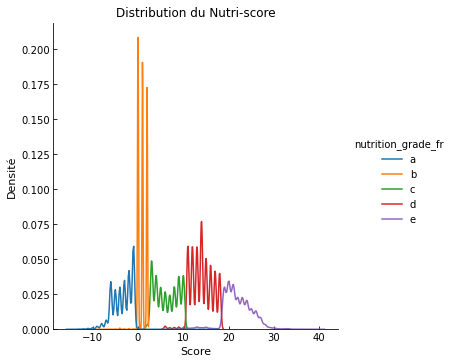

In [43]:
#Distribution du score nutritionnel regroupé par Nutri-score
sns.displot(data = data.sort_values('nutrition_grade_fr'), x = 'nutrition-score-fr_100g', hue = 'nutrition_grade_fr', kind = 'kde')
plt.title('Distribution du Nutri-score')
plt.xlabel('Score', fontsize = 11)
plt.ylabel('Densité', fontsize = 11)
plt.tick_params(direction='in')

En effet, en regardant la distribution du score, on peut bien distinguer les 5 groupes, de A a E.

In [44]:
#min et max score nutritionnel pour chaque Nutri-score
data.groupby('nutrition_grade_fr').agg(['min', 'max'])['nutrition-score-fr_100g']

C:\Users\elena\AppData\Local\Temp\ipykernel_20828\62401119.py:2: FutureWarning: ['product_name', 'pnns_groups_1', 'pnns_groups_2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('nutrition_grade_fr').agg(['min', 'max'])['nutrition-score-fr_100g']


,min,max
nutrition_grade_fr,,
a,-15.0,17.0
b,-10.0,2.0
c,2.0,10.0
d,6.0,18.0
e,10.0,40.0


Il n'y a pas des valeurs aberrantes mais on ne peut pas exclure que dans le futur il pourrait y avoir des nouvelles données avec des valeur aberrantes. La fonction `remove_outliers_scores` enlève les valeurs aberrantes.

In [45]:
data = remove_outliers_scores(data)

In [46]:
#sauvegarde dataframe
data.to_csv('Data/Cleaning/nutriscoreok.csv', index = False)

# 4. Traitement des valeurs manquantes

In [170]:
#lecture données
data = pd.read_csv('Data/Cleaning/nutriscoreok.csv', low_memory=False)

In [47]:
#taux de valeurs manquantes 
(data.isna().sum()*100/data.shape[0]).sort_values()

vitamins_100g                   0.000000
code                            0.004131
url                             0.004131
product_name                    5.628531
energy_100g                    18.938542
proteins_100g                  19.302677
salt_100g                      20.725538
sugars_100g                    23.491824
fat_100g                       24.307158
carbohydrates_100g             24.412013
saturated-fat_100g             28.199213
nutrition_grade_fr             30.756423
nutrition-score-fr_100g        30.756423
fiber_100g                     37.236828
pnns_groups_2                  77.239624
pnns_groups_1                  78.184915
fruits-vegetables-nuts_100g    99.041682
dtype: float64

Pour le calcul du Nutri-score, l'apporte en termes de vitamines est pris en compre à travers la teneur en fruits-vegetables-nuts. Cependant, cette variable présente trop de valeurs manquantes. Ainsi, je vais la supprimer.

In [48]:
data.drop('fruits-vegetables-nuts_100g', axis = 1, inplace= True) 

## 4.1 Macronutriments

### A. Glucides et sucres

Les sucres (sugars) font partie des glucides (carbohydrates), ainsi je vais les traiter ensamble. 

In [55]:
#example des données
data[['carbohydrates_100g', 'sugars_100g']].sample(10)

,carbohydrates_100g,sugars_100g
101579,NaN,46.40
306896,NaN,NaN
141258,3.57,1.79
152577,7.41,3.70
114,73.91,NaN
215464,3.00,NaN
19833,12.50,11.67
114596,20.00,3.33
123645,6.11,1.53
122655,57.14,7.14


Parmi les produits avec des valeurs manquantes il peut y avoir :  
 - des produits pour lesquels ni la valeurs des glucides, ni la valeurs de sucres est indiquée
 - des produits pour lesquels que la valeur des glucides est indiquée
 - des produits pour lesquels que la valeur des sucres est indiquée


In [56]:
#nombre des produits sans valeur de glucides ni des sucres
data[data['carbohydrates_100g'].isna()& data['sugars_100g'].isna()].shape

(59552, 16)

In [69]:
#noms des produits sans valeur de glucides ni des sucres
data.loc[data['carbohydrates_100g'].isna()& data['sugars_100g'].isna(), ["product_name",'carbohydrates_100g','sugars_100g' ]].sample(10)

,product_name,carbohydrates_100g,sugars_100g
237571,Compote de pommes,NaN,NaN
196415,Brocolis de Bretagne,NaN,NaN
265715,club orange,NaN,NaN
264758,NaN,NaN,NaN
250752,Knödel,NaN,NaN
278132,معجون طماطم,NaN,NaN
246530,NaN,NaN,NaN
278774,Yakisoba nouilles sautées bœuf et citron vert,NaN,NaN
269775,Total strained yoghourt 10%,NaN,NaN
265517,Barres céréales friselis myrtille,NaN,NaN


En regardant les noms de produits, on peut se rendre compte que certains produits doivent contenir des glucides ou des sucres, même si la valeur indiquée est NaN.
Il serait trop risqué de remplacer ces valeurs, parce que l'application doit suggérer des produits avec des teneurs en macronutriments similaires. Ainsi, en ce qui concerne les macronutriments, je préfère avoir moins des données mais fiables.


In [70]:
#Filtre pour ne garder que le valeur ou il y a au moins le glucides ou les sucres
data = data[data['carbohydrates_100g'].notna()|data['sugars_100g'].notna()]

In [71]:
data.shape

(255166, 16)

In [72]:
#taux de valeurs manquantes 
(data.isna().sum()/data.shape[0]).sort_values()

code                       0.000000
url                        0.000000
vitamins_100g              0.000000
energy_100g                0.003037
proteins_100g              0.005800
product_name               0.012890
salt_100g                  0.023632
sugars_100g                0.056359
carbohydrates_100g         0.067709
fat_100g                   0.069516
saturated-fat_100g         0.115188
nutrition_grade_fr         0.146708
nutrition-score-fr_100g    0.146708
fiber_100g                 0.226088
pnns_groups_2              0.785316
pnns_groups_1              0.785971
dtype: float64

Etant donné que parfois sucres et glucides sont considérés synonymes, l'idée est de remplacer les valeurs manquantes des glucides avec les sucres et vice-versa. Mais d'abord, je vais examiner les distributions pour vérifier si l'approche est sensée.

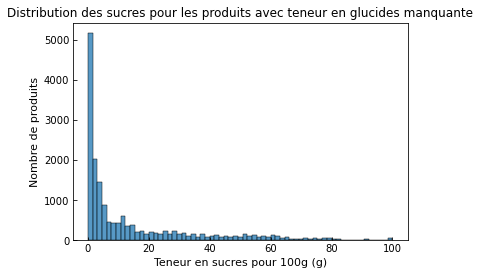

In [73]:
sns.histplot(data.loc[data['carbohydrates_100g'].isna()], x = 'sugars_100g')
plt.title('Distribution des sucres pour les produits avec teneur en glucides manquante')
plt.xlabel('Teneur en sucres pour 100g (g)', fontsize = 11)
plt.ylabel('Nombre de produits', fontsize = 11)
plt.tick_params(axis='y',direction='in')
plt.tick_params(axis='x',direction='in')

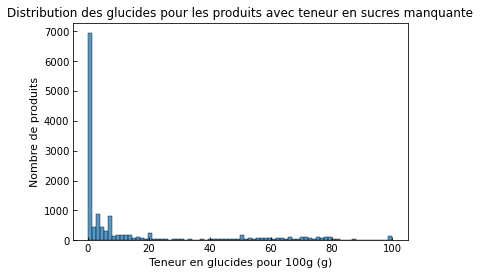

In [74]:
sns.histplot(data.loc[data['sugars_100g'].isna()], x = 'carbohydrates_100g')
plt.title('Distribution des glucides pour les produits avec teneur en sucres manquante')
plt.xlabel('Teneur en glucides pour 100g (g)', fontsize = 11)
plt.ylabel('Nombre de produits', fontsize = 11)
plt.tick_params(axis='y',direction='in')
plt.tick_params(axis='x',direction='in')

Considérant que le taux de valeur manquantes pour les glucides et sucres et de 6.8% et 5.6% respectivement, et que pour la plupart des produits avec glucides manquantes, la teneur en sucres est petite (et vice-versa), je peux utiliser le glucides pour remplacer les sucres (et vice-versa) sans risque des trop altérer la réalité.

In [75]:
#remplacement des valeurs manquantes des sucres avec la valeur de glucides correspondante
data['sugars_100g'] = data['sugars_100g'].fillna(data['carbohydrates_100g'])

In [76]:
#remplacement des valeurs manquantes des glucides avec la valeur de sucres correspondante
data['carbohydrates_100g'] = data['carbohydrates_100g'].fillna(data['sugars_100g'])

Enfin, je vais enlever les produits pour lesquels la teneur en sucres est plus grande que la teneur en glucides, qui sont à considerer aberrantes

In [77]:
#suppression données aberrantes, la différence entre glucides et sucres doit etre plus grande que 0
mask = (data['carbohydrates_100g'] - data['sugars_100g'])>= 0
data = data[mask]

In [78]:
data.shape

(254513, 16)

In [79]:
#vérification valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values()

code                       0.000000
url                        0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
vitamins_100g              0.000000
energy_100g                0.003029
proteins_100g              0.005776
product_name               0.012923
salt_100g                  0.023681
fat_100g                   0.069686
saturated-fat_100g         0.115271
nutrition_grade_fr         0.146822
nutrition-score-fr_100g    0.146822
fiber_100g                 0.226311
pnns_groups_2              0.785119
pnns_groups_1              0.785771
dtype: float64

### B. Gras et gras saturés

Pour les gras (fat) et acides gras saturés (saturated-fat), qui font partie des gras, je vais suivre le même raisonnement utilisé pour les glucides et sucres.

In [80]:
#nombre des produits sans ni valeur de gras ni valeur de gras saturés
data[data['fat_100g'].isna()& data['saturated-fat_100g'].isna()].shape

(707, 16)

In [100]:
#nom des produits sans ni valeur de gras ni valeur de gras saturés
data.loc[data['fat_100g'].isna()& data['saturated-fat_100g'].isna(),['product_name','fat_100g','saturated-fat_100g']].sample(10)

,product_name,fat_100g,saturated-fat_100g
279896,Gini passion,NaN,NaN
133246,Smokey Mesquite,NaN,NaN
65169,French vanilla,NaN,NaN
274856,coca-cola light sango,NaN,NaN
198844,Salsa medium,NaN,NaN
262891,Mango Nectar,NaN,NaN
299697,Sedani rigati,NaN,NaN
190520,Margarine 15 % doux,NaN,NaN
220526,Compote Pomme cuite au chaudron,NaN,NaN
261717,Напиток безалкогольный на ароматизаторах негаз...,NaN,NaN


En regardant les noms de produits, on peut se rendre compte que certains produits doivent contenir des gras ou des gras saturés, même si la valeur indiquée est NaN. Il serait trop risqué de remplacer ces valeurs,et je vais les supprimer. 

In [101]:
#Filtre pour ne garder que les produits pour lesquels ou il y a au moins le gras ou les gras saturés
data= data[data['fat_100g'].notna()|data['saturated-fat_100g'].notna()]

In [102]:
data.shape

(253806, 16)

In [104]:
#taux des valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values()

code                       0.000000
url                        0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
vitamins_100g              0.000000
energy_100g                0.002632
proteins_100g              0.004184
product_name               0.012868
salt_100g                  0.021918
fat_100g                   0.067095
saturated-fat_100g         0.112807
nutrition_grade_fr         0.144445
nutrition-score-fr_100g    0.144445
fiber_100g                 0.224727
pnns_groups_2              0.785943
pnns_groups_1              0.786526
dtype: float64

Comme pour les glucides et sucres, l'idée est de remplacer les valeurs manquantes des gras avec les acides gras saturés et vice-versa. Je vais examiner les distributions pour vérifier si l'approche est sensée.

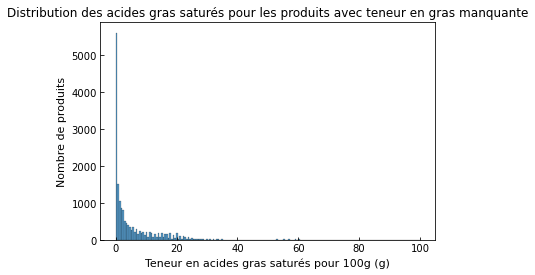

In [105]:
sns.histplot(data.loc[data['fat_100g'].isna()], x = 'saturated-fat_100g')
plt.title('Distribution des acides gras saturés pour les produits avec teneur en gras manquante')
plt.xlabel('Teneur en acides gras saturés pour 100g (g)', fontsize = 11)
plt.ylabel('Nombre de produits', fontsize = 11)
plt.tick_params(axis='y',direction='in')
plt.tick_params(axis='x',direction='in')

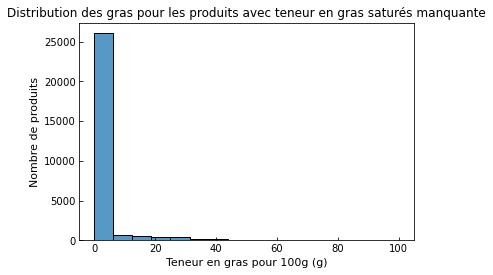

In [106]:
sns.histplot(data.loc[data['saturated-fat_100g'].isna()], x = 'fat_100g')
plt.title('Distribution des gras pour les produits avec teneur en gras saturés manquante')
plt.xlabel('Teneur en gras pour 100g (g)', fontsize = 11)
plt.ylabel('Nombre de produits', fontsize = 11)
plt.tick_params(axis='y',direction='in')
plt.tick_params(axis='x',direction='in')

Considérant que le taux de valeur manquantes pour les gras et acides gras saturés est de 6.7% et 11% respectivement et que pour la plupart des produits avec gras manquantes, la teneur en gras saturés est petite (et vice-versa), je peux utiliser le gras pour remplacer les gras saturés (et vice-versa) sans risque des trop altérer la réalité.

In [107]:
#remplacement des valeurs manquantes des gras avec la valeur de gras saturés correspondante
data['fat_100g'] = data['fat_100g'].fillna(data['saturated-fat_100g'])

In [108]:
#remplacement des valeurs manquantes des gras saturés avec la valeur de gras correspondante
data['saturated-fat_100g'] = data['saturated-fat_100g'].fillna(data['fat_100g'])

In [109]:
#vérification valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values()

code                       0.000000
url                        0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
vitamins_100g              0.000000
energy_100g                0.002632
proteins_100g              0.004184
product_name               0.012868
salt_100g                  0.021918
nutrition_grade_fr         0.144445
nutrition-score-fr_100g    0.144445
fiber_100g                 0.224727
pnns_groups_2              0.785943
pnns_groups_1              0.786526
dtype: float64

Enfin, je vais supprimer les produits pour lesquels la teneur en gras saturés est plus grande que la teneur en gras: ces produits sont à considerer aberrantes

In [110]:
#suppression données aberrantes, la différence entre gras et gras saturés doit etre plus grande que 0
mask = (data['fat_100g'] - data['saturated-fat_100g'])>= 0
data = data[mask]

In [111]:
data.shape

(253479, 16)

### C. Proteines

Pour les proteines, étant donné qu'elles font partie des macronutrients, que le taux des valeurs manquantes est de 0.4% et que je préfère avoir des données fiables, je vais supprimer les produits avec la teneur en proteines manquante

In [112]:
#filtre pour ne garder que le produits avec teneur en proteines
data = data[data["proteins_100g"].notna()]

In [113]:
data.shape

(252430, 16)

In [114]:
#vérification valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values()

code                       0.000000
url                        0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
proteins_100g              0.000000
vitamins_100g              0.000000
energy_100g                0.001640
product_name               0.012744
salt_100g                  0.021400
nutrition_grade_fr         0.140946
nutrition-score-fr_100g    0.140946
fiber_100g                 0.224003
pnns_groups_2              0.785945
pnns_groups_1              0.786523
dtype: float64

## 4.2 Apport énergétique

Pour les valeurs manquantes de l’apport énergétique (energy_100g), étant donné que j'ai les valeurs des glucides, gras et protéines, je vais les utiliser pour remplacer les valeurs manquantes. Mais d'abord, je vais vérifier qu'il s'agit d'une approche raisonnable en comparant les distributions de la variables energy_100g et de l’énergie calculée.

In [118]:
#nouveau dataframe pour la comparaison de energy_100g avec l'apport calculé
energy = data[ ['energy_100g']]

In [119]:
#calcul apport énergetique
energy["calculated energy"] = (data["fat_100g"]*9 + data["carbohydrates_100g"]*4 + data["proteins_100g"]*4)*4.1868

C:\Users\elena\AppData\Local\Temp\ipykernel_20828\2293293487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy["calculated energy"] = (data["fat_100g"]*9 + data["carbohydrates_100g"]*4 + data["proteins_100g"]*4)*4.1868


In [120]:
#example des données
energy.sample(10)

,energy_100g,calculated energy
10529,791.0,814.751280
66980,1494.0,1472.874372
105254,837.0,837.360000
166602,1941.0,1921.364388
72959,301.0,311.497920
287606,1856.0,1838.005200
121036,1795.0,1974.034332
277422,372.0,362.451276
202605,1932.0,1907.924760
243649,1039.0,1048.374720


En effet, les valeurs semblent etre proches.

In [121]:
#statistiques sur l'apport énergetique
energy.describe()

,energy_100g,calculated energy
count,2.520160e+05,252430.000000
mean,1.150640e+03,1104.902779
std,6.540724e+03,807.915314
min,0.000000e+00,0.000000
25%,3.869250e+02,347.671872
50%,1.109000e+03,1059.574410
75%,1.674000e+03,1674.720000
max,3.251373e+06,6001.191648


La médiane et la moyenne sont similaires. Par contre, il doit y avoir des valeurs aberrantes: l'apport énergétique maximal est pour une teneur en gras de 100g, et 100g*9kcal/g*4.1868 = 3768.12 kJ. Je vais filtrer pour ne garder que les valeurs inférieures à 3768.12.

In [122]:
energy = energy.loc[(energy["energy_100g"] <= 3768.12)&(energy["calculated energy"] <= 3768.12)]

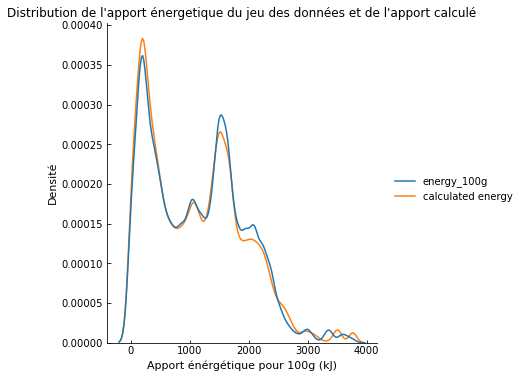

In [123]:
#Comparaison des distributions de l'apport énergétique du jeu des données et celui calculé
sns.displot(data = energy, kind = 'kde')
plt.title('Distribution de l\'apport énergetique du jeu des données et de l\'apport calculé')
plt.xlabel('Apport énérgétique pour 100g (kJ)', fontsize = 11)
plt.ylabel('Densité', fontsize = 11)
plt.tick_params(axis='y',direction='in')
plt.tick_params(axis='x',direction='in')

Les distributions ne se superposent pas exactment, mais il est raisonnable de remplacer les valeurs manquantes avec l'apport énérgétique calculé. La fonction `energy_100_null_values` remplace les valeurs manquantes et supprime les valeurs aberrantes.

In [126]:
data = energy_100_null_values(data)

In [127]:
#nombre des lignes et colonnes
data.shape

(252084, 16)

In [128]:
#vérification valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values()

code                       0.000000
url                        0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
proteins_100g              0.000000
vitamins_100g              0.000000
product_name               0.012746
salt_100g                  0.021398
nutrition_grade_fr         0.140596
nutrition-score-fr_100g    0.140596
fiber_100g                 0.223763
pnns_groups_2              0.785762
pnns_groups_1              0.786341
dtype: float64

## 4.3 Teneur en sel

In [129]:
#informations statistiques sur la teneur en sel
data['salt_100g'].describe()

count    246690.000000
mean          0.913919
std           1.212912
min           0.000000
25%           0.060000
50%           0.543560
75%           1.300000
max          10.000000
Name: salt_100g, dtype: float64

(0.0, 3.0)

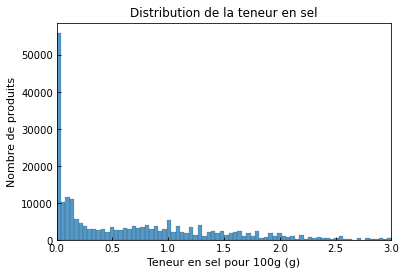

In [130]:
#Distribution de la teneur en sel
sns.histplot(data['salt_100g'])
plt.title('Distribution de la teneur en sel')
plt.xlabel('Teneur en sel pour 100g (g)', fontsize = 11)
plt.ylabel('Nombre de produits', fontsize = 11)
plt.tick_params(axis='y',direction='in')
plt.tick_params(axis='x',direction='in')
plt.xlim((0,3))

Je vais regarder le nom de certains produits pour lesquels la teneur en sel est manquante, afin de comprendre s'il s'agit des produits sans sel ou pas.

In [137]:
#example des produits pour lesquels la teneur en sel est manquante
data.loc[data['salt_100g'].isna(), "product_name"].sample(10)

248538                                       sesame cracker
246163    Levadura de cerveza ecológica &quot;Ecocesta P...
233382          Picknick Morceaux de thon à la sauce tomate
193334                                      10 Jambons Gril
219543                                    Fanta Free Orange
229375                                              Ricotta
200223                                  Cheese Burger Halal
187878         Les Cocottes, Porc et Chorizo à la Catalane 
190441                   Huile d'olive fraîchement extraite
172544    Apéricube (23 % MG) - (Saveurs : Poêlée de St-...
Name: product_name, dtype: object

Certains produits contiennent surement du sel: je ne peux pas remplacer les valeurs manquantes avec 0. Je vais utiliser la médiane, car la distribution du sel est asymettrique. 

In [138]:
#remplacement valeurs manquantes avec la médiane
data['salt_100g'] = data['salt_100g'].fillna(data['salt_100g'].median())

## 4.4 Teneur en fibres

In [139]:
#informations statistiques sur les fibres
data['fiber_100g'].describe()

count    195677.000000
mean          2.788842
std           4.289534
min           0.000000
25%           0.000000
50%           1.500000
75%           3.600000
max          60.000000
Name: fiber_100g, dtype: float64

(0.0, 10.0)

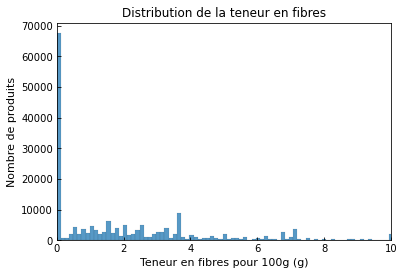

In [140]:
#Distribution de la teneur en fibres
sns.histplot(data.loc[data['fiber_100g'].notna(), 'fiber_100g'])
plt.title('Distribution de la teneur en fibres')
plt.xlabel('Teneur en fibres pour 100g (g)', fontsize = 11)
plt.ylabel('Nombre de produits', fontsize = 11)
plt.tick_params(axis='y',direction='in')
plt.tick_params(axis='x',direction='in')
plt.xlim((0,10))

Je vais regarder le nom de certains produits pour lesquels la teneur en fibres est manquante, afin de comprendre s'il s'agit des produits sans fibres ou pas.

In [148]:
#example des produits pour lesquels la teneur en fibres est manquante
data.loc[data['fiber_100g'].isna(), 'product_name'].sample(10)

196044                                         Purée Pommes
198078                                      Cacao noir 100%
25792                             Fiesta!, Soda, Lemon Lime
44337                                                 Candy
38522                                      Canola Oil Blend
14013                       Jamaican Herbal Tea, Peppermint
160092    Grown-Up-Soda, Lightly Sweetened Blackberry So...
226184                           Choux-fleurs en fleurettes
189117       Biscuits sablés à la noix de coco Leader Price
14081     Flavored Sparkling Water Beverage, White Grape...
Name: product_name, dtype: object

On peut trouver certains produits qui probablement contiennent des fibres (cacao et choux-fleurs). Ainsi, je ne peux pas remplacer les valeurs manquantes avec 0. Aussi, étant donné que le taux de valeurs manquantes est 22%, si je remplaçais les valeurs manquantes avec une valeur constante je risquerai d'avoir autour de 50k produits avec le meme valeur de teneur en fibre, ce qui n'a pas beaucoup de sens. Ainsi, je prefer utiliser le KNN imputer. 

In [149]:
#variables d'entrée du KNN imputer
nutrients_columns = [ 'fat_100g', 
                     'saturated-fat_100g', 
                     'carbohydrates_100g',
                     'sugars_100g', 
                     'fiber_100g', 
                     'proteins_100g', 
                     'salt_100g',
                    ]

La fonction `knn_imputer` retourne les variables en entrée sans valeurs manquantes

In [150]:
#imputation KNN
imputed_data = knn_imputer(data, nutrients_columns, 5)

Avant de remplacer les valeurs manquantes, je vais comparer les distributions des valeurs imputées et des valeurs d'origine.

(0.0, 10.0)

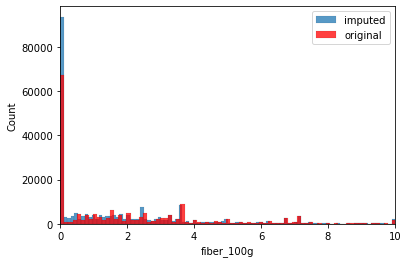

In [151]:
#Comparaison des distributions
sns.histplot(imputed_data['fiber_100g'])
sns.histplot(data.loc[data['fiber_100g'].notna(), "fiber_100g"], color='r')
plt.legend(labels = ["imputed", "original"])
plt.xlim((0, 10))

Les valeurs imputées reflètent la distribution de départ, je vais donc les utilise pour le remplacement.

In [152]:
#remplacement valeurs manquantes
data['fiber_100g'] = data['fiber_100g'].fillna(imputed_data['fiber_100g'])

In [153]:
#vérification valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values()

code                       0.000000
url                        0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
salt_100g                  0.000000
vitamins_100g              0.000000
product_name               0.012746
nutrition_grade_fr         0.140596
nutrition-score-fr_100g    0.140596
pnns_groups_2              0.785762
pnns_groups_1              0.786341
dtype: float64

Enfin, je vais supprimer les produits pour lesquels la somme des macronutriments, sel, fibres et vitamines dépasse les 100g: ces produits sont à considérer aberrants.

In [154]:
#suppression des valeurs aberrantes: la somme des nutriments est 100g au maximum
mask = data['fat_100g'] + data['carbohydrates_100g']+ data['proteins_100g']+  data['vitamins_100g']+ data['salt_100g']+ data['fiber_100g'] <= 100
data = data[mask]

In [155]:
#nombre des lignes et colonnes
data.shape

(229513, 16)

Autour de 22k données ont été supprimées

In [156]:
#reset de l'index après la suppression des données aberrantes
data.reset_index().drop("index", axis = 1, inplace= True)

In [157]:
#sauvegarde du dataframe
data.to_csv('Data/Cleaning/nullvaluesnutrientsok.csv', index = False)


## 4.5 Score nutritionnel

In [258]:
data=pd.read_csv('Data/Cleaning/nullvaluesnutrientsok.csv', low_memory= False)

Etant donné que le score nutritionnel peut être calculé à partir des nutriments d'un produit, il est raisonnable d'utiliser le KNN Imputer pour remplacer les valeurs manquantes : des produits avec une teneur en nutriments similaire auront un score nutritionnel similaire. Pour l’imputation, je vais fournir en entrée les variables qui rentrent dans le calcul du Nutri-score.

In [158]:
#selection variables d'entrée pour le KNN imputer
knn_data_nutriscore = [
    'energy_100g', 
    'fat_100g', 
    'saturated-fat_100g',
    'sugars_100g', 
    'fiber_100g', 
    'proteins_100g',
    'salt_100g', 
    'nutrition-score-fr_100g', 
    'vitamins_100g']

In [159]:
#imputation KNN
imputed_data_score = knn_imputer(data, knn_data_nutriscore, 5)

In [161]:
#remplacement valeurs manquantes
data['nutrition-score-fr_100g'] = data['nutrition-score-fr_100g'].fillna(imputed_data_score['nutrition-score-fr_100g'].astype('int64'))

In [162]:
#vérification valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values()

code                       0.000000
url                        0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
salt_100g                  0.000000
nutrition-score-fr_100g    0.000000
vitamins_100g              0.000000
product_name               0.013616
nutrition_grade_fr         0.147090
pnns_groups_2              0.769617
pnns_groups_1              0.770253
dtype: float64

In [163]:
#sauvegarde du dataframe
data.to_csv("Data/Cleaning/categories_imputer_ok.csv", index = False)

## 4.6 Catégorie du produit : PNNS groups


In [164]:
#lecture données
data = pd.read_csv("Data/Cleaning/categories_imputer_ok.csv", low_memory = False)

En ce qui concerne les catégories, je n'avais gardé que `pnns_groups_1` et `pnns_groups_2` avec 9 et 36 valeurs uniques, respectivement.
Ces variables ont un taux similaire des valeurs manquantes. 
L'idée est d'abord d’utiliser un KNN Imputer pour remplacer les valeurs manquantes du `pnns_groups_1`, dont les catégories sont plus génériques. Si j'obtiens des catégories cohérentes, je vais utiliser un 2eme KNN Imputer pour remplacer les valeurs manquantes de la variable `pnns_groups_2`. La fonction `knn_imputer_categorical` realise toutes les étapes nécessaires aux remplacement des valeurs manquantes,labélisation des catégories,  scaling, imputation, transformations inverser et remplacement des valeurs manquantes.

### 4.6.1 pnns_groups_1

In [165]:
#variables à fournir en entrée au KNN imputer
columns_knn_pnns_1 = [
    'pnns_groups_1',
    'energy_100g', 
    'fat_100g',
    'saturated-fat_100g', 
    'carbohydrates_100g', 
    'sugars_100g', 
    'fiber_100g',
    'proteins_100g', 
    'salt_100g', 
    'nutrition-score-fr_100g',
    'vitamins_100g']

In [166]:
#imputation KNN
data = knn_imputer_categorical(data, 'pnns_groups_1', columns_knn_pnns_1, 15)

C:\Users\elena\AppData\Local\Temp\ipykernel_20828\230069972.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_columns[categorical]= data_columns[categorical].astype('float64')


In [24]:
#vérification valeurs manquantes
data.isna().sum()

code                            0
url                             0
product_name                 3139
nutrition_grade_fr          33812
pnns_groups_1                   0
pnns_groups_2              176989
energy_100g                     0
fat_100g                        0
saturated-fat_100g              0
carbohydrates_100g              0
sugars_100g                     0
fiber_100g                      0
proteins_100g                   0
salt_100g                       0
nutrition-score-fr_100g         0
vitamins_100g                   0
dtype: int64

Pour vérifier que le KNN Imputer a produit des données cohérentes, je vais examiner les noms de produits et la catégorie `pnns_groups_1`

In [391]:
data[['product_name', 'pnns_groups_1']].sample(10)

,product_name,pnns_groups_1
158012,Ice Tea saveur Mangue,Beverages
182584,Champignons de Paris entiers 1er choix Bio,Fruits and vegetables
112041,"Somerdale, Tintern Aged Cheddar Cheese With Ch...",Milk and dairy products
204856,Côte d'Or noir noisettes,Sugary snacks
47334,Lobster Bisque,Composite foods
3535,"Spreadable Butter, Olive Oil And Sea Salt",Fat and sauces
197641,Galettes mexicaines,Cereals and potatoes
40603,Cauliflower Florets,Fat and sauces
14642,Apple Sauce,Beverages
87905,Shaved Parmesan Cheese,Milk and dairy products


En ayant regardé plusieurs échantillons, j'ai pu observer que l'association produit-catégorie n'est pas exacte au 100%. Par exemple, Cauliflower Florets devrait faire partir de `Fruits et vegetables`, alors qu’ici il est classé comme `Fat and sauces`. J'estime l'erreur à 5-10%.

Je pense que malgré l'erreur, l'application pourrait être faisable: il y a des chances que si un produit est mal classé, aussi les produits similaires seront mal classés et vont rentrer dans la même 'mauvaise' catégorie. Ainsi, en cherchant des produits similaires dans la même ‘mauvaise’ catégorie, l'application va pouvoir repérer les bons produits.

In [167]:
#Vérification valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values()

code                       0.000000
url                        0.000000
pnns_groups_1              0.000000
energy_100g                0.000000
fat_100g                   0.000000
saturated-fat_100g         0.000000
carbohydrates_100g         0.000000
sugars_100g                0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
salt_100g                  0.000000
nutrition-score-fr_100g    0.000000
vitamins_100g              0.000000
product_name               0.013616
nutrition_grade_fr         0.147090
pnns_groups_2              0.769617
dtype: float64

### 4.6.2 pnns_groups_2

Je vais remplacer les valeurs manquantes de la variable `pnns_groups_2` à l'aide du KNN imputer

In [168]:
#labelisation données pnns_groups_1
labels = LabelEncoder()
pnns_1_num = labels.fit_transform(data['pnns_groups_1'])
data['pnns_groups_1_num'] = pnns_1_num

In [169]:
#variables à fournir en entrée au KNN imputer
columns_knn_pnns_2 = [
    'pnns_groups_1_num',
    'pnns_groups_2',
    'energy_100g', 
    'fat_100g',
    'saturated-fat_100g', 
    'carbohydrates_100g', 
    'sugars_100g', 
    'fiber_100g',
    'proteins_100g', 
    'salt_100g', 
    'nutrition-score-fr_100g',
    'vitamins_100g']

In [170]:
#imputation
data = knn_imputer_categorical(data, 'pnns_groups_2', columns_knn_pnns_2, 15)

C:\Users\elena\AppData\Local\Temp\ipykernel_20828\230069972.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_columns[categorical]= data_columns[categorical].astype('float64')


Pour vérifier que le KNN Imputer a produit des données cohérentes, je vais examiner les noms de produits et la catégorie `pnns_groups_2`

In [398]:
data[['product_name','pnns_groups_1', 'pnns_groups_2']].sample(10)

,product_name,pnns_groups_1,pnns_groups_2
179169,Coppa,Fish Meat Eggs,Processed meat
100032,"Muscle Milk, 30g Protein Crunch Bar, Vanilla A...",Fruits and vegetables,Meat
223139,Dulce de membrillo,Fruits and vegetables,Fruits
32828,"Sour Cream, Light",Milk and dairy products,Dairy desserts
97555,"Rubicon Bakers, Fruit & Bran Muffins",Sugary snacks,Cereals
217224,Farce pour vol-au-vent M-Classic.,Fish Meat Eggs,Meat
154842,Filets d'anchois marines au citron confit,Fish Meat Eggs,Fish and seafood
186484,Crème de Caramel au Beurre Salé,Sugary snacks,Sweets
212432,Qualité et Prix Giandino Blanc,Salty snacks,Eggs
184491,Olive Huile d'olive vierge extra 60% MG (Tarti...,Fat and sauces,Fats


Ici, on peut voir clairement que l'association produit-catégorie `pnns_groups_2` est plutôt incohérente, peut être en raison de trop nombreuses classes. Je préfère supprimer cette variable.

In [401]:
#suppression variables 
data = data.drop(['pnns_groups_2', 'pnns_groups_1_num'], axis = 1)

## 4.7 Nutri-score

Pour le `nutrition_grade_fr`, je peux tout simplement faire la conversion entre `nutrition-score-fr_100g` et grade détaillée ici :
https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique

La fonction 'fill_nutrition_scores' réalise la conversion.
(A noter que la conversion pourrait ne pas être exacte à 100%, parce qu’elle est différente pour produits solides et boissons, et pour distinguer les deux je me base sur la variable `pnns_groups_1` qui n'est pas exacte à 100. L’analyse de la cohérence de données est faite dans le Notebook 'Nardi_Elena_2_notebook_exploration_112022').

In [405]:
data = fill_nutrition_scores(data)

C:\Users\elena\AppData\Local\Temp\ipykernel_20828\230069972.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sol.loc[data_grade, "calculated_grade"] = grade
C:\Users\elena\AppData\Local\Temp\ipykernel_20828\230069972.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bev.loc[data_grade, 'calculated_grade'] = grade


In [406]:
#vérification valeurs manquantes
data.isna().sum()

code                          0
url                           0
product_name               3125
nutrition_grade_fr            0
pnns_groups_1                 0
energy_100g                   0
fat_100g                      0
saturated-fat_100g            0
carbohydrates_100g            0
sugars_100g                   0
fiber_100g                    0
proteins_100g                 0
salt_100g                     0
nutrition-score-fr_100g       0
vitamins_100g                 0
dtype: int64

Il reste encore des produits sans `product_name`, mais c'est n'est pas important parce que le code et l'url du produit sont disponibles. Enfine, je vais transformer la variable `code` pour ne pas avoir le DtypeWarning à l'ouverture du fichier. 

In [407]:
data['code'] = data['code'].astype('float64')
data['code'] = data['code'].astype('int64')

In [408]:
data.to_csv("Data/Cleaning/cleaned_data.csv", index = False)

# 5. Conclusions

A partir du jeu de données de départ, des variables potentiellement intéressantes pour l’application ont été sélectionnées : macronutriments, vitamines, nutriments qui rentrent dans le calcul du Nutri-score, variables liées à la catégorie du produit et variables liées au Nutri-score.
Une première analyse de ces variables a permis de supprimer les valeurs aberrantes et filtrer ultérieurement les variables, notamment :
 - Pour la teneur en macronutriments, des limites inferieures (0g) et supérieures (10g, 60g ou 100g selon la variable) ont été imposées
 - Pour la teneur en vitamines, des limites inferieures (0g) et supérieures (1g) ont été imposées, les variables de type vitamine ont été remplacées avec la somme des vitamines
 - Pour les catégories, que la variables 'ppns_groups_1' a été retenue
 - Pour le Nutri-score, le score nutritionnel français et le Nutri-score français ont été retenus
 
Suite à cette analyse, les valeurs manquantes ont été traités en choisissant la méthode appropriée selon le taux et la typologie des variables :
 - Pour les macronutriments, suppression des produits si glucides et sucres sont tous les deux manquantes, gras et gras satures sont tous les deux manquantes, ou les protéines sont manquantes. Ensuite, remplacement des glucides avec sucres et vice-versa, et de même pour gras et gras saturés.
 - Calcul des valeurs manquantes à partir d'autres variables pour l'apport énergétique et le Nutri-Score
 - Remplacement avec la médiane pour la teneur en sel
 - KNN Imputer pour la teneur en fibres, le score nutritionnel et la catégorie du produit
 
Ainsi, le jeu de données est nettoyé et exploitable. Mais pour justifier la faisabilité de l'application, il faut explorer et analyser plus en détail les données. L'exploration et l'analyse sont décrites dans la 'Notebook' 'Nardi_Elena_2_notebook_exploration_112022'.

